# Вариант 1

Загрузить файл с информацией о диабетах и построить модель классификации на основе имеющихся данных.

In [108]:
import pandas as pd

df = pd.read_csv('diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [109]:
df.isna().sum() # Нету нулей - кайф

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [110]:
from sklearn.model_selection import train_test_split
 
x = df.drop(['Pregnancies', 'Outcome'], axis=1) # Убрал беременность, так как она не влияет на диабет :)
y = df['Outcome']
 
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, stratify=y, random_state=42)


In [111]:
from keras.models import Sequential
from keras.layers import Dense
 
model = Sequential() 
model.add(Dense(128, activation='relu', input_dim=7)) # не знаешь, что вставлять в скрытый слой - вставляй relu
model.add(Dense(1, activation='sigmoid')) 
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])  # используем метрику accuracy, так как она хорошо себя показывает в бин классификации
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 128)               1024      
                                                                 
 dense_11 (Dense)            (None, 1)                 129       
                                                                 
Total params: 1,153
Trainable params: 1,153
Non-trainable params: 0
_________________________________________________________________


In [112]:
hist = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=100, batch_size=100) # Повысим кол-во эпох, чтобы уменьшить функцию ошибки

Epoch 1/100
7/7 [==============================] - 1s 40ms/step - loss: 11.4786 - accuracy: 0.6401 - val_loss: 5.7207 - val_accuracy: 0.5390
Epoch 2/100
7/7 [==============================] - 0s 8ms/step - loss: 4.4965 - accuracy: 0.4186 - val_loss: 5.7930 - val_accuracy: 0.3506
Epoch 3/100
7/7 [==============================] - 0s 14ms/step - loss: 4.0503 - accuracy: 0.3257 - val_loss: 3.1525 - val_accuracy: 0.3701
Epoch 4/100
7/7 [==============================] - 0s 11ms/step - loss: 2.9431 - accuracy: 0.5554 - val_loss: 2.9480 - val_accuracy: 0.5195
Epoch 5/100
7/7 [==============================] - 0s 8ms/step - loss: 2.2369 - accuracy: 0.4788 - val_loss: 3.0814 - val_accuracy: 0.3312
Epoch 6/100
7/7 [==============================] - 0s 11ms/step - loss: 1.8068 - accuracy: 0.4365 - val_loss: 1.8062 - val_accuracy: 0.5455
Epoch 7/100
7/7 [==============================] - 0s 10ms/step - loss: 1.3237 - accuracy: 0.5977 - val_loss: 1.4595 - val_accuracy: 0.3442
Epoch 8/100
7/7 [====

Визуализируем то, что мы обучили

[]

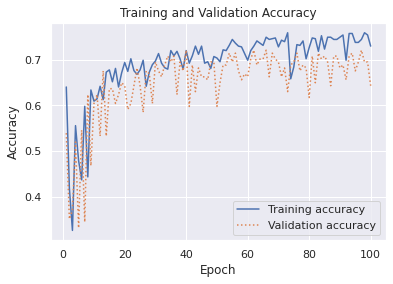

In [113]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
 
acc = hist.history['accuracy']
val = hist.history['val_accuracy']
epochs = range(1, len(acc) + 1)
 
plt.plot(epochs, acc, '-', label='Training accuracy')
plt.plot(epochs, val, ':', label='Validation accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.plot()

Построим confusion matrix - хороша, когда надо показать точность после обучения

5/5 [==============================] - 0s 3ms/step


Text(89.18, 0.5, 'Actual label')

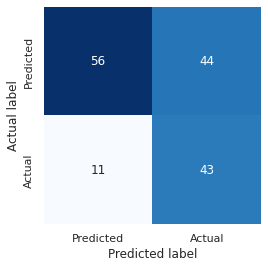

In [114]:
from sklearn.metrics import confusion_matrix
 
y_predicted = model.predict(x_test) > 0.5
mat = confusion_matrix(y_test, y_predicted)
labels = ['Predicted', 'Actual']
 
sns.heatmap(mat, square=True, annot=True, fmt='d', cbar=False, cmap='Blues',
            xticklabels=labels, yticklabels=labels)
 
plt.xlabel('Predicted label')
plt.ylabel('Actual label')

# Вариант 2

Загрузить файлы и информацией о лицах, перевести в тензорный формат и построить модель классификации.

In [115]:
import numpy as np
from PIL import Image



In [116]:
from sklearn.datasets import fetch_olivetti_faces

olivetti = fetch_olivetti_faces()
data = olivetti.images
target = olivetti.target

In [117]:
print("There are {} images in the dataset".format(len(data)))
print("There are {} unique targets in the dataset".format(len(np.unique(target))))
print("Size of each image is {}x{}".format(data.shape[1],data.shape[2]))
print("Pixel values were scaled to [0,1] interval. e.g:{}".format(data[0][0,:4]))

There are 400 images in the dataset
There are 40 unique targets in the dataset
Size of each image is 64x64
Pixel values were scaled to [0,1] interval. e.g:[0.30991736 0.3677686  0.41735536 0.44214877]


In [118]:
print("unique target number:",np.unique(target))


unique target number: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39]


Выведем форму произвольного изображения:

In [119]:
data[359].shape

(64, 64)

Выведем произвольное изображение из датасета

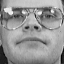

In [120]:
im = Image.fromarray(data[359] * 256)
new_im = im.convert('RGB')

display(new_im)

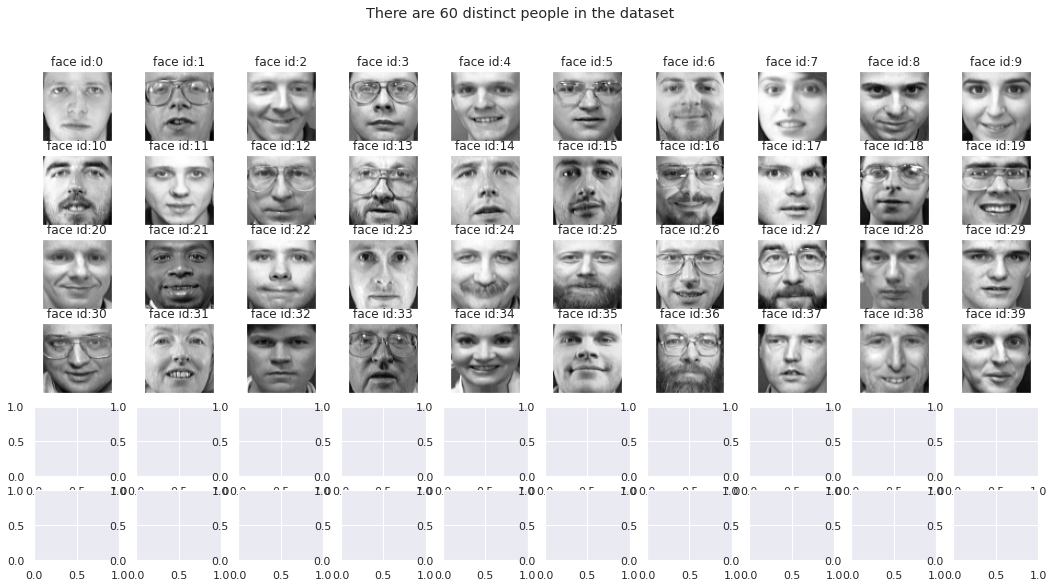

In [121]:
def show_60_distinct_people(images, unique_ids):
    fig, axarr=plt.subplots(nrows=6, ncols=10, figsize=(18, 9))
    axarr=axarr.flatten()
    
    #iterating over user ids
    for unique_id in unique_ids:
        image_index=unique_id*10
        axarr[unique_id].imshow(images[image_index], cmap='gray')
        axarr[unique_id].set_xticks([])
        axarr[unique_id].set_yticks([])
        axarr[unique_id].set_title("face id:{}".format(unique_id))
    plt.suptitle("There are 60 distinct people in the dataset")

show_60_distinct_people(data, np.unique(target))


In [122]:
X=data.reshape((data.shape[0],data.shape[1]*data.shape[2]))
print("X shape:",X.shape)

X shape: (400, 4096)


In [123]:
X_train, X_test, y_train, y_test=train_test_split(X, target, test_size=0.3, stratify=target, random_state=42)
print("X_train shape:",X_train.shape)
print("y_train shape:{}".format(y_train.shape))

X_train shape: (280, 4096)
y_train shape:(280,)


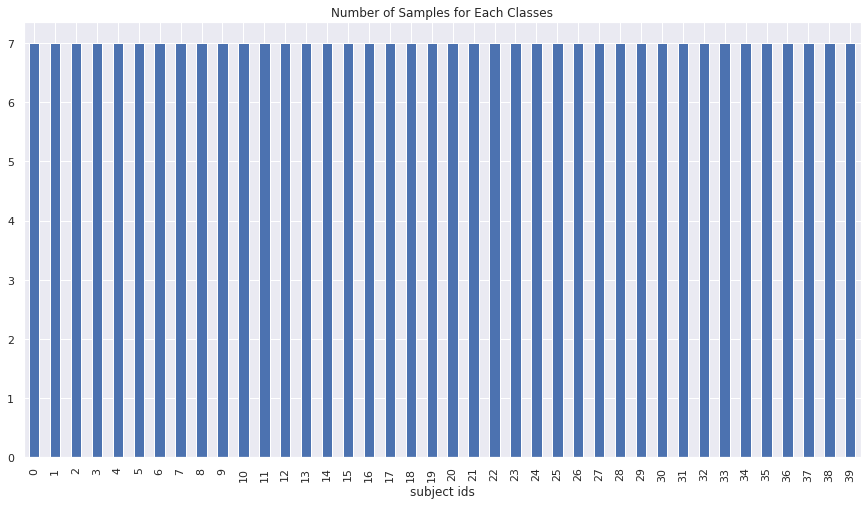

In [124]:
y_frame=pd.DataFrame()
y_frame['subject ids']=y_train
y_frame.groupby(['subject ids']).size().plot.bar(figsize=(15,8),title="Number of Samples for Each Classes")

In [125]:
from sklearn.decomposition import PCA
pca=PCA(n_components=2)
pca.fit(X)
X_pca=pca.transform(X)

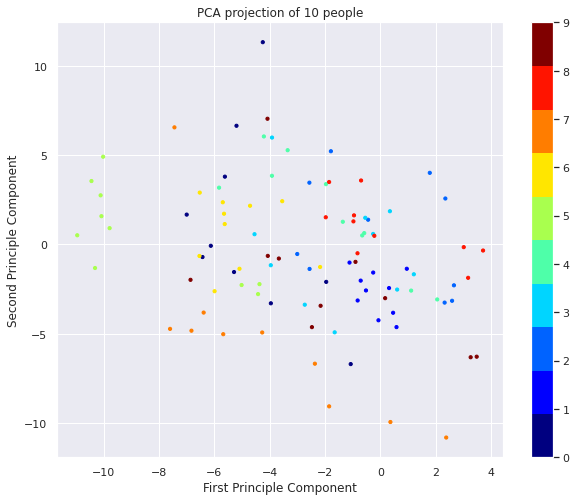

In [126]:
number_of_people=10
index_range=number_of_people*10
fig=plt.figure(figsize=(10,8))
ax=fig.add_subplot(1,1,1)
scatter=ax.scatter(X_pca[:index_range,0],
            X_pca[:index_range,1], 
            c=target[:index_range],
            s=10,
           cmap=plt.get_cmap('jet', number_of_people)
          )

ax.set_xlabel("First Principle Component")
ax.set_ylabel("Second Principle Component")
ax.set_title("PCA projection of {} people".format(number_of_people))

fig.colorbar(scatter)

In [127]:
n_components=90


In [128]:
pca=PCA(n_components=n_components, whiten=True)
pca.fit(X_train)

PCA(n_components=90, whiten=True)

In [129]:
X_train_pca=pca.transform(X_train)
X_test_pca=pca.transform(X_test)

In [130]:
import sklearn
from sklearn import metrics
clf = sklearn.svm.SVC()
clf.fit(X_train_pca, y_train)
y_pred = clf.predict(X_test_pca)
print("accuracy score:{:.2f}".format(metrics.accuracy_score(y_test, y_pred)))

accuracy score:0.99


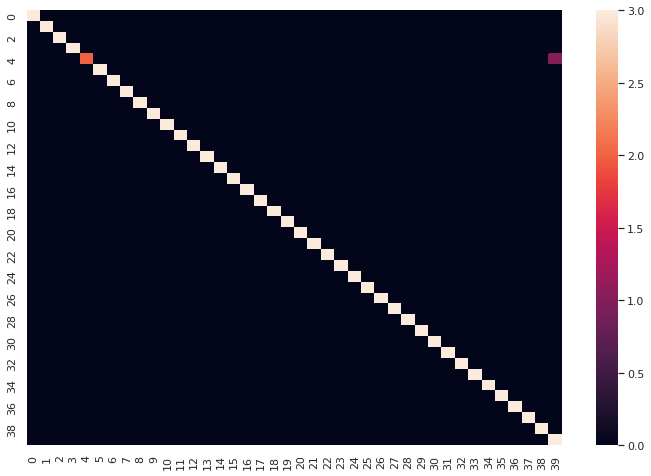

In [131]:
import seaborn as sns
plt.figure(1, figsize=(12,8))
sns.heatmap(metrics.confusion_matrix(y_test, y_pred))

# Вариант 3

Построить модель линейной регрессии на имеющихся данных

In [132]:
import matplotlib.pyplot as plt

df_x = pd.read_csv('x.csv')
df_y = pd.read_csv('y.csv')

df_x.head()

,Unnamed: 0,0
0,0,1.462108
1,1,1.133769
2,2,-2.301539
3,3,1.744812
4,4,0.042214


In [133]:
df_x = df_x.rename({'Unnamed: 0': "first"}, axis=1)
df_y = df_y.rename({'Unnamed: 0': "first"}, axis=1)

res = pd.merge(df_x, df_y, on = 'first' ) # , on=0)

In [134]:
df_res = res.iloc[:, [1,2]]
df_res.head()

,0_x,0_y
0,1.462108,101.159902
1,1.133769,78.442913
2,-2.301539,-159.238195
3,1.744812,120.719533
4,0.042214,2.920673


Зашумим входные данные

In [135]:
noise = np.random.randint(-100, 340, size=20) / 10
df_res['0_y'] = df_res['0_y'] + noise

<ipython-input-135-aa757312d54a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_res['0_y'] = df_res['0_y'] + noise


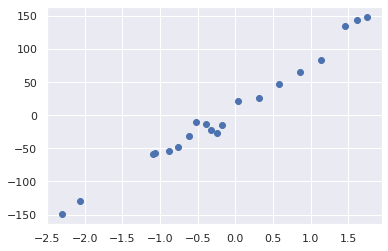

In [136]:
plt.figure()
plt.scatter(df_res['0_x'], df_res['0_y'])
plt.show()

In [137]:
import torch
df_res

,0_x,0_y
0,1.462108,134.659902
1,1.133769,83.542913
2,-2.301539,-149.738195
3,1.744812,148.819533
4,0.042214,21.220673
5,-0.611756,-31.626026
6,0.319039,26.673585
7,-0.761207,-48.666163
8,0.582815,47.323651
9,-1.099891,-58.698960


In [138]:
X = torch.tensor(df_res[['0_x']].values, dtype=torch.float32)
y = torch.tensor(df_res[['0_y']].values, dtype=torch.float32)

In [139]:
in_features = 1 
out_features = 1 
reg_model = torch.nn.Linear(in_features=in_features, out_features=out_features, bias=True)

In [140]:
mse_loss = torch.nn.MSELoss() # Добавляем ошибку
optimizer = torch.optim.SGD(reg_model.parameters(), lr=0.002)

n_epoch = 6000
for i in range(n_epoch):
    y_pred = reg_model(X)
    step_loss = mse_loss(y_pred, y)
    optimizer.zero_grad()
    step_loss.backward()
    optimizer.step()
    print ('epoch [{}], MSE (детерминация): {:.2f}'.format(i, step_loss.item()))

Выходные данные были обрезаны до нескольких последних строк (5000).
epoch [1000], MSE (детерминация): 112.20
epoch [1001], MSE (детерминация): 112.19
epoch [1002], MSE (детерминация): 112.18
epoch [1003], MSE (детерминация): 112.17
epoch [1004], MSE (детерминация): 112.17
epoch [1005], MSE (детерминация): 112.16
epoch [1006], MSE (детерминация): 112.15
epoch [1007], MSE (детерминация): 112.14
epoch [1008], MSE (детерминация): 112.13
epoch [1009], MSE (детерминация): 112.13
epoch [1010], MSE (детерминация): 112.12
epoch [1011], MSE (детерминация): 112.11
epoch [1012], MSE (детерминация): 112.10
epoch [1013], MSE (детерминация): 112.10
epoch [1014], MSE (детерминация): 112.09
epoch [1015], MSE (детерминация): 112.08
epoch [1016], MSE (детерминация): 112.07
epoch [1017], MSE (детерминация): 112.07
epoch [1018], MSE (детерминация): 112.06
epoch [1019], MSE (детерминация): 112.05
epoch [1020], MSE (детерминация): 112.04
epoch [1021], MSE (детерминация): 112.04
epoch [1022], MSE (детерминаци

Как мы видим, после определенного момента наш коэф ошибки не изменился

In [141]:
reg_model.bias.item() # Смотрим на байсавский нейрон

12.532685279846191

In [142]:
reg_model.weight.item() # смотрим на веса (чтобы точно убедиться, что наш градиент зануляется после каждой итерации, иначе нейрон нельзя обучить)

72.54546356201172

In [143]:
from sklearn.metrics import r2_score
r2_score(y_true=y, y_pred=y_pred.detach().numpy()) # кв ошибки

0.9828412400211831

# Отчетность

В первую очередь в работе должна быть продемонстрирована ваша архитектура и процесс обучения (с кратким обоснованием выбора гиперпараметров).


Далее:

(В конце вашего ноутбука укажите следующие данные)

По задачам классификации:

1.  Вывести метрики классификации на тестовом множестве: accuracy, precision, recall и f1-score(для бинарной) и метрик качества для каждого класса, в случае использования датасета с лицами.
2.  Обосновать выбранное соотношение train/test на основе построения кривых обучения (или понятного вывода результатов эксперимента) 



По задаче регрессии:



1.   Вывести коэффициент детерминации и средний квадрат ошибки
2.   Продемнострировать, что выбрано оптимальное соотношение train/test, путем перебора всех содержательных вариантов.

